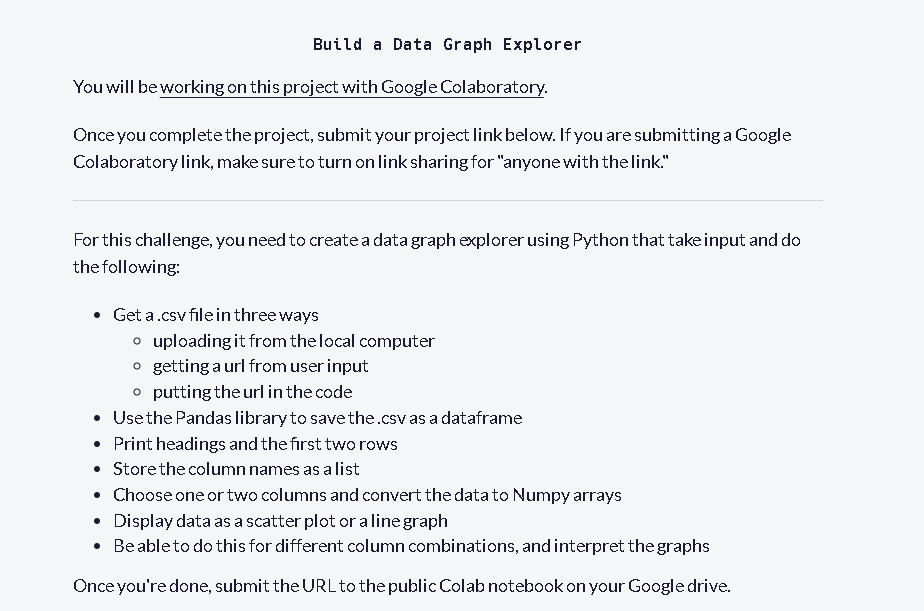

In [ ]:

"""
"Parsear" es el proceso de analizar una cadena de texto (como un archivo XML, JSON, HTML, etc.) para
 descomponerla en sus partes componentes y extraer la información estructurada que contiene.

Cuando hablamos de parsear un archivo XML, significa leer el contenido del archivo y convertirlo en una
estructura de datos que se pueda manipular fácilmente en el programa.
"""
#tomare los datos de criminaldiad de los angeles en formato XML
#Drug overdose death rates, by drug type, sex, age, race, and Hispanic origin: United States
import numpy as np
import pandas as pd
import requests
import xml.etree.ElementTree as ET

# URL del archivo XML
url = 'https://data.cdc.gov/api/views/95ax-ymtc/rows.xml?accessType=DOWNLOAD'

# Obtener el contenido del archivo XML desde la URL
response = requests.get(url)

# Parsear el XML # leemos y estructuramos los datos del XML
root = ET.fromstring(response.content)

# Obtener los datos relevantes del XML y almacenarlos en una lista de diccionarios
data = []
for row in root.iter('row'):
    row_data = {}
    for field in row.iter():
        row_data[field.tag] = field.text
    data.append(row_data)

# Crear un DataFrame de Pandas
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print(df.head())



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   row             0 non-null      object
 1   indicator       6229 non-null   object
 2   panel           6229 non-null   object
 3   panel_num       6229 non-null   object
 4   unit            6229 non-null   object
 5   unit_num        6229 non-null   object
 6   stub_name       6229 non-null   object
 7   stub_name_num   6229 non-null   object
 8   stub_label      6229 non-null   object
 9   stub_label_num  6229 non-null   object
 10  year            6229 non-null   object
 11  year_num        6229 non-null   object
 12  age             6229 non-null   object
 13  age_num         6229 non-null   object
 14  estimate        5118 non-null   object
 15  flag            1112 non-null   object
dtypes: object(16)
memory usage: 778.8+ KB


In [7]:
"""
Entonces, df.isnull().sum() devuelve una Serie que muestra el número de valores nulos en cada columna del DataFrame df.
Es una forma eficiente y común de contar los valores nulos en un DataFrame de Pandas.
"""

df.isnull().sum()


row               6229
indicator            0
panel                0
panel_num            0
unit                 0
unit_num             0
stub_name            0
stub_name_num        0
stub_label           0
stub_label_num       0
year                 0
year_num             0
age                  0
age_num              0
estimate          1111
flag              5117
dtype: int64

In [8]:
#Use the Pandas library to save the .csv as a dataframe
df.to_csv('Drug overdose death rates.csv', index=False)

In [9]:
#Print headings and the first two rows
df.head(2)



,row,indicator,panel,panel_num,unit,unit_num,stub_name,stub_name_num,stub_label,stub_label_num,year,year_num,age,age_num,estimate,flag
0,None,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 85 years and over,3.29,2018,20,85 years and over,1.91,0.4,*
1,None,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN


In [11]:
df["panel"]

0       Drug overdose deaths involving heroin
1                    All drug overdose deaths
2                    All drug overdose deaths
3                    All drug overdose deaths
4                    All drug overdose deaths
                        ...                  
6224    Drug overdose deaths involving heroin
6225    Drug overdose deaths involving heroin
6226    Drug overdose deaths involving heroin
6227    Drug overdose deaths involving heroin
6228    Drug overdose deaths involving heroin
Name: panel, Length: 6229, dtype: object

In [13]:
#Store the column names as a list
l = []

for a in df["panel"]:
  l.append(a)

print(l)
#it worked

['Drug overdose deaths involving heroin', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All drug overdose deaths', 'All d

In [16]:
import numpy as np
#Choose one or two columns and convert the data to Numpy arrays
# Convertir una columna a un arreglo de NumPy
columna1_array = df['unit_num'].values
columna1_array

array(['2', '1', '1', ..., '2', '2', '2'], dtype=object)

In [29]:
# agrupamos lsos datos, la idea es ver cuales son los casos mas graves yque aparecen con mas frecuencia.
df['unit_num'] = df['unit_num'].astype(int)
casos_sum = df.groupby('unit').agg({'unit_num': 'sum'})

In [30]:
casos.head()

,unit_num
unit,
"Deaths per 100,000 resident population, age-adjusted",2628
"Deaths per 100,000 resident population, crude",7202


In [34]:
#otra pensado para graficar es agrupar por año y por unidades de eese año creo que es mejor
df['year'] = df['year'].astype(int)
df['year_num'] = df['year_num'].astype(int)
year_sum = df.groupby('year').agg({'year_num': 'sum'})
year_sum.head()

,year_num
year,
1999,306
2000,612
2001,918
2002,1224
2003,1530


In [41]:
year_sum.index

Int64Index([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='year')

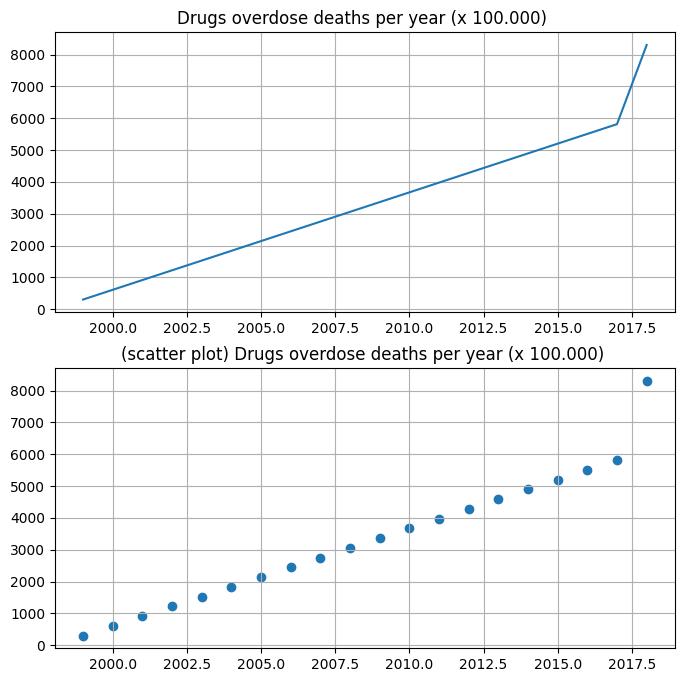

In [45]:
#Display data as a scatter plot or a line graph
import seaborn as sns
import matplotlib.pyplot as plt

 # Plot the table

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot the function
ax1.plot(year_sum.index.astype(int), year_sum["year_num"])
ax1.set_title(f'Drugs overdose deaths per year (x 100.000) ')
ax1.grid(True)

# Plot the table

ax2.scatter(year_sum.index.astype(int), year_sum["year_num"])
ax2.set_title(f'(scatter plot) Drugs overdose deaths per year (x 100.000) ')
ax2.grid(True)

plt.show()
#utilidad del  "= np.linspace(0, 10, 100)"



dudas propias sobre:

np.linspace(start, stop, num)

---
Claro, aquí tienes una explicación más detallada de la función `np.linspace(0, 10, 100)` y de cada uno de sus parámetros:

```python
np.linspace(start, stop, num)
```

- `start`: Este parámetro especifica el valor inicial de la secuencia. En el caso de `np.linspace(0, 10, 100)`, `start` es 0, lo que significa que la secuencia comenzará en 0.

- `stop`: Este parámetro especifica el valor final de la secuencia. En el caso de `np.linspace(0, 10, 100)`, `stop` es 10, lo que significa que la secuencia terminará en 10.

- `num`: Este parámetro especifica el número de puntos que se generarán en la secuencia. En el caso de `np.linspace(0, 10, 100)`, `num` es 100, lo que significa que se generarán 100 puntos equiespaciados entre 0 y 10.

Entonces, en resumen, `np.linspace(0, 10, 100)` genera una secuencia de 100 puntos equiespaciados entre 0 y 10, inclusivo. Esta función es útil para generar ejes x para gráficos, crear muestras equiespaciadas en un rango específico y para otros fines donde se necesitan datos equiespaciados en un intervalo dado.

Interpretation of the graph:

The graph shows the amount of deaths per year for a specific period of time. We observe that as the years advance, the amount of deaths tends to increase consistently. This pattern suggests a clear trend of increase in the number of deaths over time.

This upward trend in the number of deaths can be the result of various factors, such as population growth, population aging, lifestyle changes, medical advances that prolong life but also increase the prevalence of chronic diseases , among others.

It is important to consider the specific context of the data set and the external factors that can influence the observed trend. However, based only on the information provided by the graph, we can conclude that there is a clear trend of increase in the number of deaths per year over time.